# Acessando Banco de Dados com Python

Documentação SQLite: http://www.sqlite.org/docs.html

In [1]:
# Reemove o arquivo com o banco de dados SQLite (caso exista)
import os
os.remove("escola.db") if os.path.exists("escola.db") else None

In [2]:
# Importando o módulo de acesso ao SQLite
import sqlite3

In [3]:
# Cria uma conexão com o banco de dados. 
# Se o banco de dados não existir, ele é criado neste momento. 

#OBS:Observar o diretório onde está o arq!!!
con = sqlite3.connect('escola.db')

In [4]:
type(con)

sqlite3.Connection

In [5]:
# Criando um cursor 
# (Um cursor permite percorrer todos os registros em um conjunto de dados)
cur = con.cursor()

In [6]:
type(cur)

sqlite3.Cursor

In [7]:
# Cria uma instrução sql
sql_create = 'create table cursos '\
'(id integer primary key, '\
'titulo varchar(100), '\
'categoria varchar(140))'

In [8]:
# Executando a instrução sql no cursor
cur.execute(sql_create)

In [9]:
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into cursos values (?, ?, ?)'

In [10]:
# Dados
recset = [(1000, 'Ciência de Dados', 'Data Science'),
          (1001, 'Big Data Fundamentos', 'Big Data'),
          (1002, 'Python Fundamentos', 'Análise de Dados')]

In [11]:
# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)

In [12]:
# Grava a transação
con.commit()

In [13]:
# Criando outra sentença SQL para selecionar registros
sql_select = 'select * from cursos'

In [14]:
# Seleciona todos os registros e recupera os registros
cur.execute(sql_select)
dados = cur.fetchall()

In [15]:
# Mostra
for linha in dados:
    print ('Curso Id: %d, Título: %s, Categoria: %s \n' % linha)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 



In [16]:
# Gerando outros registros
recset = [(1003, 'Gestão de Dados com MongoDB', 'Big Data'),
          (1004, 'R Fundamentos', 'Análise de Dados')]

# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)
    
# Gravando a transação
con.commit()

In [17]:
# Seleciona todos os registros
cur.execute('select * from cursos')

# Recupera os resultados
recset = cur.fetchall()

# Mostra
for rec in recset:
    print ('Curso Id: %d, Título: %s, Categoria: %s \n' % rec)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 

Curso Id: 1003, Título: Gestão de Dados com MongoDB, Categoria: Big Data 

Curso Id: 1004, Título: R Fundamentos, Categoria: Análise de Dados 



In [18]:
# Fecha a conexão
con.close()

# Insert SQLite - Criando o Banco de Dados e Inserindo Dados

In [27]:
# Reemove o arquivo com o banco de dados SQLite (caso exista)
import os
os.remove("mydb.db") if os.path.exists("mydb.db") else None

In [28]:
import sqlite3
 
# Criando uma conexão: PADRÃO
conn = sqlite3.connect('mydb.db')   

# Criando um cursor: PADRÃO
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2020-05-02 14:32:11', 'Teclado', 90 )")
    conn.commit()
    c.close()
    conn.close()

In [29]:
# Criar tabela com fç acima:
create_table()

In [30]:
# Inserir dados com fç acima:
data_insert()

# Insert SQLite  - Inserindo Dados com Variáveis

In [31]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão
conn = sqlite3.connect('mydb.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES('2020-05-02 12:34:45', 'Teclado', 130.00 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados : NOVA FUNÇÃO!!  
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()

In [32]:
# Gerando valores e inserindo na tabela 
for i in range(10):
    data_insert_var()
    time.sleep(1)

In [33]:
# Encerrando a conexão
c.close()
conn.close()

# Select SQLite

In [34]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão: PADRÃO
conn = sqlite3.connect('mydb.db')   

# Criando um cursor: PADRÃO
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2020', 'teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])         


In [35]:
# Select nos dados
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2020-11-10 13:40:24.700231', 'Monitor', 78.0)
(12, '2020-11-10 13:40:25.857095', 'Monitor', 55.0)
(13, '2020-11-10 13:40:27.039697', 'Monitor', 66.0)
(14, '2020-11-10 13:40:28.159483', 'Monitor', 69.0)
(15, '2020-11-10 13:40:29.220828', 'Monitor', 71.0)
(16, '2020-11-10 13:40:30.282169', 'Monitor', 99.0)
(17, '2020-11-10 13:40:31.344220', 'Monitor', 55.0)
(18, '2020-11-10 13:40:32.432155', 'Monitor', 59.0)
(19, '2020-11-10 13:40:33.502948', 'Monitor', 56.0)
(20, '2020-11-10 13:40:34.606282', 'Monitor', 96.0)


In [36]:
# Leitura de registros específicos
leitura_registros()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2020-11-10 13:40:24.700231', 'Monitor', 78.0)
(13, '2020-11-10 13:40:27.039697', 'Monitor', 66.0)
(14, '2020-11-10 13:40:28.159483', 'Monitor', 69.0)
(15, '2020-11-10 13:40:29.220828', 'Monitor', 71.0)
(16, '2020-11-10 13:40:30.282169', 'Monitor', 99.0)
(20, '2020-11-10 13:40:34.606282', 'Monitor', 96.0)


In [37]:
# Leitura de colunas específicas
leitura_colunas()

90.0
78.0
55.0
66.0
69.0
71.0
99.0
55.0
59.0
56.0
96.0


In [38]:
# Encerrando a conexão; PADRÃO
c.close()
conn.close()

# Update e Delete SQLite

In [39]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão
conn = sqlite3.connect('mydb.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
      
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2020', 'teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 70.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor = 99.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 53.0")
    conn.commit()

In [40]:
atualiza_dados()

In [41]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2020-11-10 13:40:24.700231', 'Monitor', 78.0)
(12, '2020-11-10 13:40:25.857095', 'Monitor', 55.0)
(13, '2020-11-10 13:40:27.039697', 'Monitor', 66.0)
(14, '2020-11-10 13:40:28.159483', 'Monitor', 69.0)
(15, '2020-11-10 13:40:29.220828', 'Monitor', 71.0)
(16, '2020-11-10 13:40:30.282169', 'Monitor', 70.0)
(17, '2020-11-10 13:40:31.344220', 'Monitor', 55.0)
(18, '2020-11-10 13:40:32.432155', 'Monitor', 59.0)
(19, '2020-11-10 13:40:33.502948', 'Monitor', 56.0)
(20, '2020-11-10 13:40:34.606282', 'Monitor', 96.0)


In [42]:
remove_dados()

In [43]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2020-11-10 13:40:24.700231', 'Monitor', 78.0)
(12, '2020-11-10 13:40:25.857095', 'Monitor', 55.0)
(13, '2020-11-10 13:40:27.039697', 'Monitor', 66.0)
(14, '2020-11-10 13:40:28.159483', 'Monitor', 69.0)
(15, '2020-11-10 13:40:29.220828', 'Monitor', 71.0)
(16, '2020-11-10 13:40:30.282169', 'Monitor', 70.0)
(17, '2020-11-10 13:40:31.344220', 'Monitor', 55.0)
(18, '2020-11-10 13:40:32.432155', 'Monitor', 59.0)
(19, '2020-11-10 13:40:33.502948', 'Monitor', 56.0)
(20, '2020-11-10 13:40:34.606282', 'Monitor', 96.0)


# Grafico

In [44]:
# Instala a versão exata do pacote matplotlib
!pip install -q -U matplotlib==3.2.1

In [45]:
import matplotlib as mat
mat.__version__

'3.2.1'

In [47]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt

#COMANDO ABAIXO ABRE NESSE JNB, N EM OUTRA TABELA
%matplotlib notebook
 
# Criando uma conexão
conn = sqlite3.connect('mydb.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
     
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(now, 'Teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor > 80.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

# Gerar gráfico com os dados no banco de dados
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


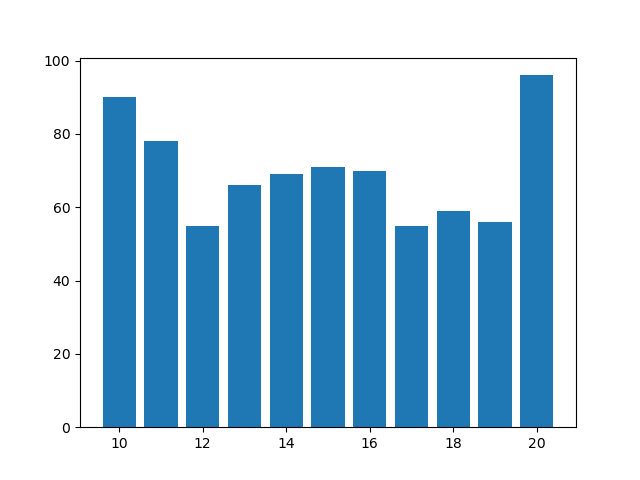

In [48]:
# Gerando gráficos
dados_grafico()

# End